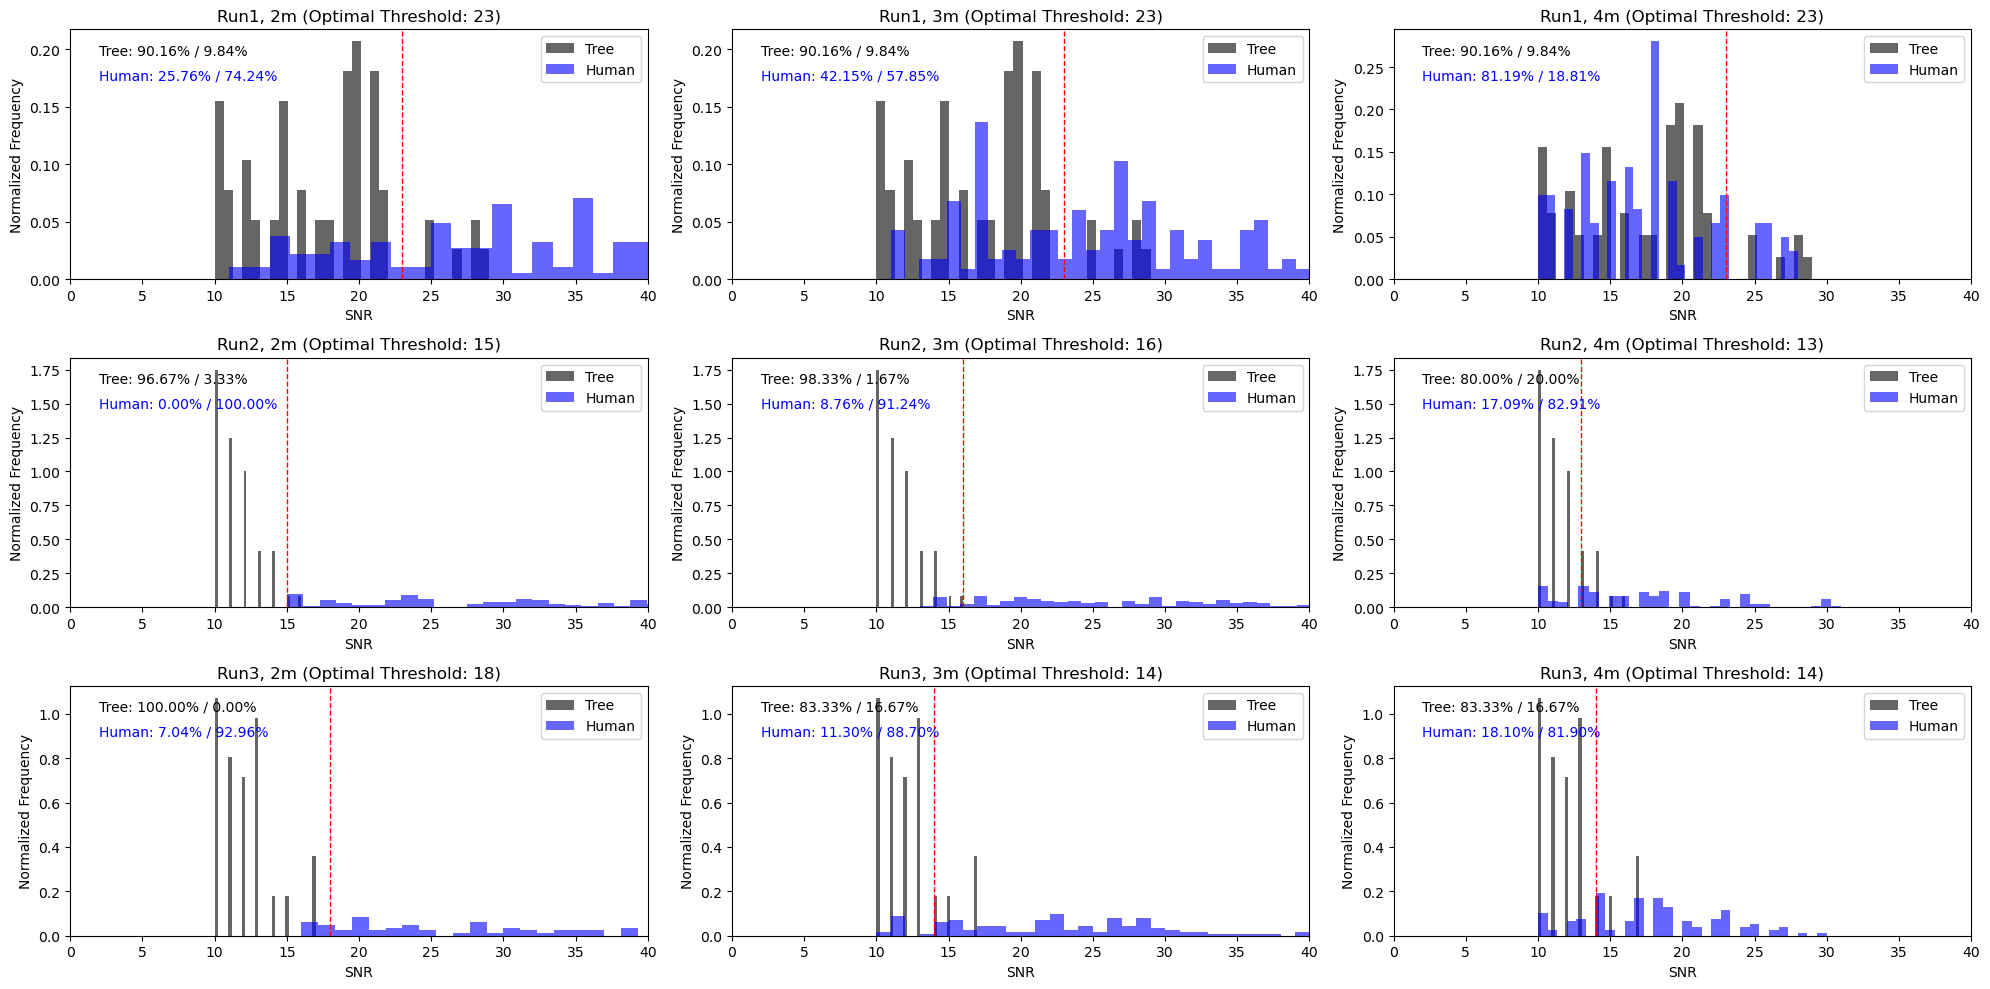

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

xlsx_file_tree = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/TREE/#116_cyclic1_UART_Tree_Run1.rec.xlsx" 
xlsx_file_hum = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/FOV/#FR180_LX3_FOV_2m_14dB_Run1.rec.xlsx" 

fig, axes = plt.subplots(3, 3, figsize=(20, 10))  
axes = axes.flatten() 

threshold_range = range(10, 25)

def find_optimal_threshold(SNR_tree, SNR_hum):
    max_sum = 0
    optimal_threshold = 0

    for threshold in threshold_range:
        left_tree = (SNR_tree < threshold).sum()
        right_tree = (SNR_tree >= threshold).sum()
        total_tree = left_tree + right_tree
        left_tree_ratio = left_tree / total_tree if total_tree > 0 else 0
        right_tree_ratio = right_tree / total_tree if total_tree > 0 else 0

        left_hum = (SNR_hum < threshold).sum()
        right_hum = (SNR_hum >= threshold).sum()
        total_hum = left_hum + right_hum
        left_hum_ratio = left_hum / total_hum if total_hum > 0 else 0
        right_hum_ratio = right_hum / total_hum if total_hum > 0 else 0
        
        current_sum = left_tree_ratio + right_hum_ratio
        if current_sum > max_sum:
            max_sum = current_sum
            optimal_threshold = threshold
    return optimal_threshold

plot_idx = 0

for i in range(1, 4):  
    df_tree = pd.read_excel(xlsx_file_tree.replace("Run1", f"Run{i}"), sheet_name='CloudPoint')
    SNR_tree = df_tree[(df_tree['@_Range'] < 7) & (df_tree['@_Y'] > 0.8) & (df_tree['@_SNR'] >= 10) & (df_hum['@_tID'] < 20)]['@_SNR']
    
    for j in range(2, 5):  
        df_hum = pd.read_excel(xlsx_file_hum.replace("2m", f"{j}m").replace("Run1", f"Run{i}"), sheet_name='CloudPoint')
        SNR_hum = df_hum[(df_hum['@_Range'] < 7) & (df_hum['@_Y'] > 0.8) & (df_hum['@_SNR'] >= 10) & (df_hum['@_tID'] < 20)]['@_SNR']

        optimal_threshold = find_optimal_threshold(SNR_tree, SNR_hum)

        ax = axes[plot_idx] 
        ax.hist(SNR_tree, bins=30, color='black', alpha=0.6, density=True, label='Tree')
        ax.hist(SNR_hum, bins=30, color='blue', alpha=0.6, density=True, label='Human')
        ax.axvline(optimal_threshold, color='red', linestyle='--', linewidth=1)

        left_tree = (SNR_tree < optimal_threshold).sum()
        right_tree = (SNR_tree >= optimal_threshold).sum()
        total_tree = left_tree + right_tree
        left_tree_ratio = left_tree / total_tree if total_tree > 0 else 0
        right_tree_ratio = right_tree / total_tree if total_tree > 0 else 0

        left_hum = (SNR_hum < optimal_threshold).sum()
        right_hum = (SNR_hum >= optimal_threshold).sum()        
        total_hum = left_hum + right_hum
        left_hum_ratio = left_hum / total_hum if total_hum > 0 else 0
        right_hum_ratio = right_hum / total_hum if total_hum > 0 else 0

        name = f"Run{i}, {j}m (Optimal Threshold: {optimal_threshold})"
        ax.set_title(name)
        ax.set_xlabel('SNR')
        ax.set_ylabel('Normalized Frequency')
        ax.set_xlim(0, 40)

        ax.text(0.05, 0.9, f'Tree: {left_tree_ratio:.2%} / {right_tree_ratio:.2%}', transform=ax.transAxes, color='black')
        ax.text(0.05, 0.8, f'Human: {left_hum_ratio:.2%} / {right_hum_ratio:.2%}', transform=ax.transAxes, color='blue')

        ax.legend()
        plot_idx += 1  

plt.tight_layout()
plt.show()


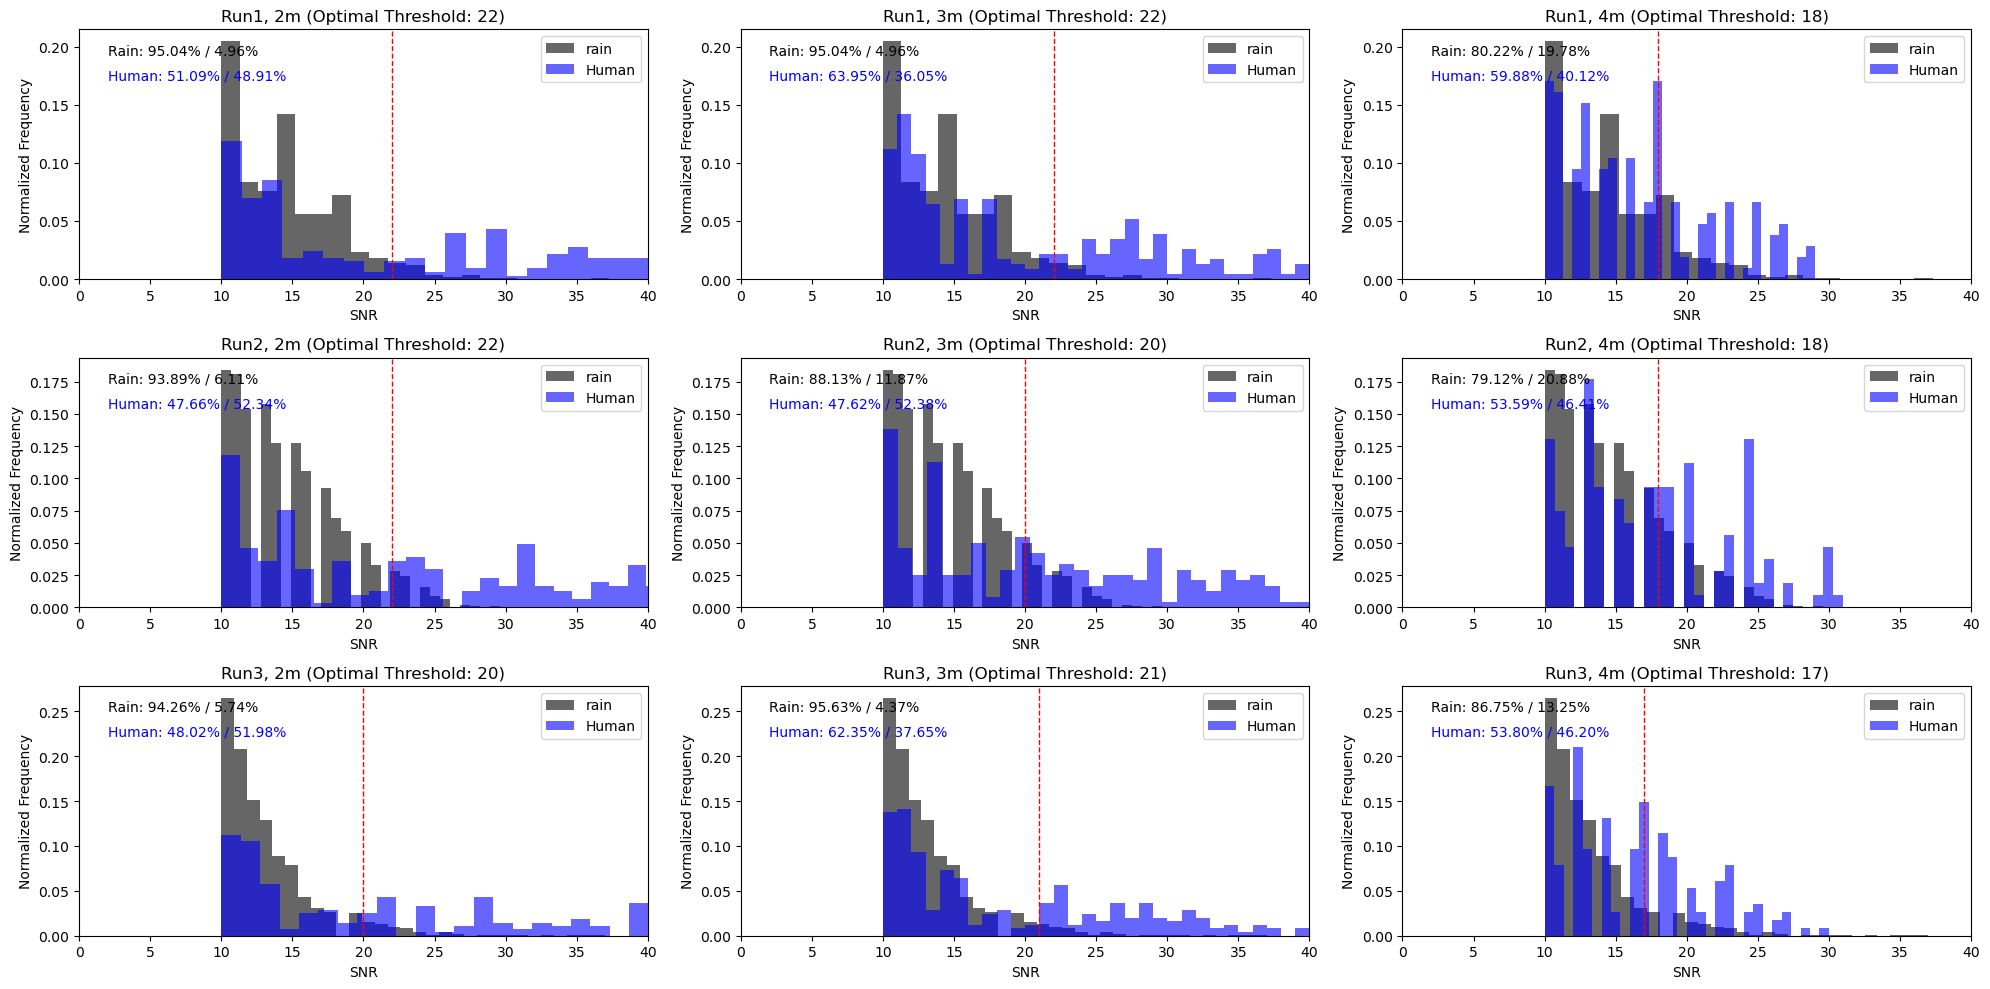

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

xlsx_file_rain = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/rain/RR_#025_LX3_Rain_Cyclic Mode 1_Run1.rec.xlsx" 
xlsx_file_hum = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/FOV/#FR180_LX3_FOV_2m_14dB_Run1.rec.xlsx" 

fig, axes = plt.subplots(3, 3, figsize=(20, 10))  
axes = axes.flatten() 

threshold_range = range(10, 25)

def find_optimal_threshold(SNR_rain, SNR_hum):
    max_sum = 0
    optimal_threshold = 0

    for threshold in threshold_range:
        left_rain = (SNR_rain < threshold).sum()
        right_rain = (SNR_rain >= threshold).sum()
        total_rain = left_rain + right_rain
        left_rain_ratio = left_rain / total_rain if total_tree > 0 else 0
        right_rain_ratio = right_rain / total_rain if total_tree > 0 else 0

        left_hum = (SNR_hum < threshold).sum()
        right_hum = (SNR_hum >= threshold).sum()
        total_hum = left_hum + right_hum
        left_hum_ratio = left_hum / total_hum if total_hum > 0 else 0
        right_hum_ratio = right_hum / total_hum if total_hum > 0 else 0
        
        current_sum = left_rain_ratio + right_hum_ratio
        if current_sum > max_sum:
            max_sum = current_sum
            optimal_threshold = threshold
    return optimal_threshold

plot_idx = 0

for i in range(1, 4):  
    df_rain = pd.read_excel(xlsx_file_rain.replace("Run1", f"Run{i}"), sheet_name='CloudPoint')
    SNR_rain = df_rain[(df_tree['@_Range'] < 7) & (df_rain['@_Y'] > 0.8) & (df_rain['@_SNR'] >= 10)]['@_SNR']
    
    for j in range(2, 5):  
        df_hum = pd.read_excel(xlsx_file_hum.replace("2m", f"{j}m").replace("Run1", f"Run{i}"), sheet_name='CloudPoint')
        SNR_hum = df_hum[(df_hum['@_Range'] < 7) & (df_hum['@_Y'] > 0.8) & (df_hum['@_SNR'] >= 10)]['@_SNR']

        optimal_threshold = find_optimal_threshold(SNR_tree, SNR_hum)

        ax = axes[plot_idx] 
        ax.hist(SNR_rain, bins=30, color='black', alpha=0.6, density=True, label='rain')
        ax.hist(SNR_hum, bins=30, color='blue', alpha=0.6, density=True, label='Human')
        ax.axvline(optimal_threshold, color='red', linestyle='--', linewidth=1)

        left_rain = (SNR_rain < optimal_threshold).sum()
        right_rain = (SNR_rain >= optimal_threshold).sum()
        total_rain = left_rain + right_rain
        left_rain_ratio = left_rain / total_rain if total_rain > 0 else 0
        right_rain_ratio = right_rain / total_rain if total_rain > 0 else 0

        left_hum = (SNR_hum < optimal_threshold).sum()
        right_hum = (SNR_hum >= optimal_threshold).sum()        
        total_hum = left_hum + right_hum
        left_hum_ratio = left_hum / total_hum if total_hum > 0 else 0
        right_hum_ratio = right_hum / total_hum if total_hum > 0 else 0

        name = f"Run{i}, {j}m (Optimal Threshold: {optimal_threshold})"
        ax.set_title(name)
        ax.set_xlabel('SNR')
        ax.set_ylabel('Normalized Frequency')
        ax.set_xlim(0, 40)

        ax.text(0.05, 0.9, f'Rain: {left_rain_ratio:.2%} / {right_rain_ratio:.2%}', transform=ax.transAxes, color='black')
        ax.text(0.05, 0.8, f'Human: {left_hum_ratio:.2%} / {right_hum_ratio:.2%}', transform=ax.transAxes, color='blue')

        ax.legend()
        plot_idx += 1  

plt.tight_layout()
plt.show()


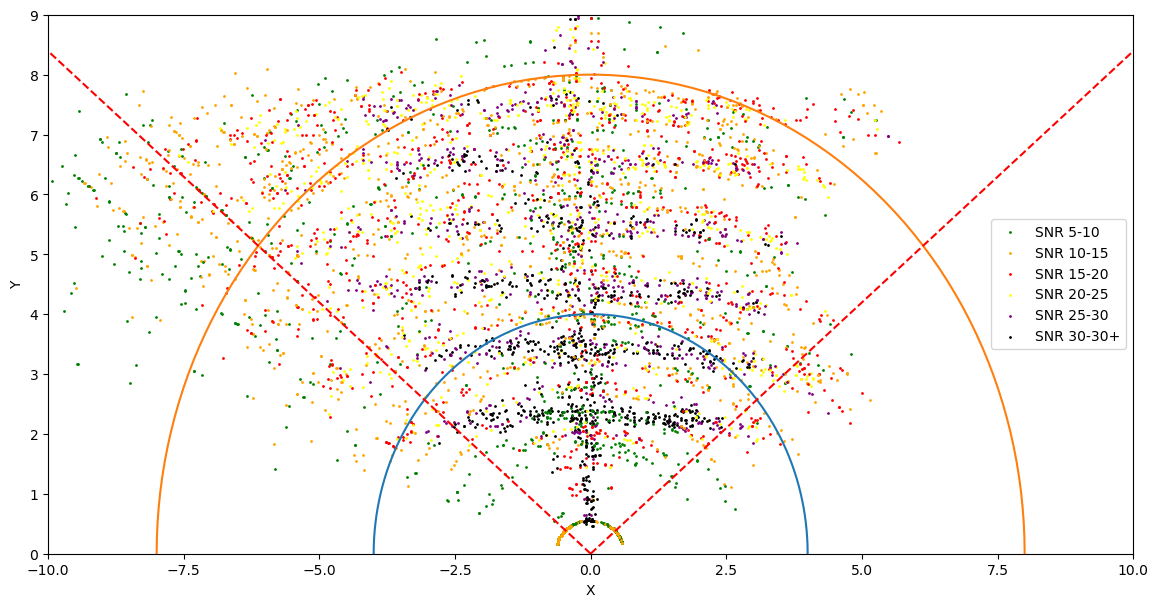

R = 2 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 35.00  AVG SNR: 23.03
R = 3 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 29.00  AVG SNR: 18.25
R = 4 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 26.00  AVG SNR: 15.80
R = 5 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 27.00  AVG SNR: 15.09
R = 6 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 24.00  AVG SNR: 14.94
R = 7 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 21.00  AVG SNR: 13.88
R = 2 m, angle = 50(±2)  MIN SNR: 13.00  MAX SNR: 48.00  AVG SNR: 30.45
R = 3 m, angle = 50(±2)  MIN SNR: 12.00  MAX SNR: 53.00  AVG SNR: 29.69
R = 4 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 41.00  AVG SNR: 26.60
R = 5 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 38.00  AVG SNR: 23.09
R = 6 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 37.00  AVG SNR: 22.06
R = 7 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 33.00  AVG SNR: 20.41


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import warnings
warnings.filterwarnings('ignore')



path = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/20241119_S6QI_FOV/*.xlsx"
file_paths = glob.glob(path)

conditions = [
    ((0, 5), 'blue'),
    ((5, 10), 'green'),
    ((10, 15), 'orange'),
    ((15, 20), 'red'),
    ((20, 25), 'yellow'),
    ((25, 30), 'purple'),
    ((30, float('inf')), 'black')
]

labels_added = {color: False for _, color in conditions}
all_data = []

angle = 40
R1 = 4
R2 = 8

Rmax = 45
Amax = 0.1
angles = np.linspace((180/angle-1)*np.pi/(180/angle), np.pi/(180/angle), 100)  # 135 to 45 degrees
A3 = np.linspace((180/Amax-1)*np.pi/(180/Amax), np.pi/(180/Amax), 100)

x1 = R1 * np.cos(A3)
y1 = R1 * np.sin(A3)
x2 = R2 * np.cos(A3)
y2 = R2 * np.sin(A3)
x3 = Rmax * np.cos(angles)
y3 = Rmax * np.sin(angles)

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(x1, y1)
ax.plot(x2, y2)

ax.plot([0, x3[0]], [0, y3[0]], 'r--')  
ax.plot([0, x3[-1]], [0, y3[-1]], 'r--') 


for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='CloudPoint')
    
    df_filtered = df[df['@_Range'] < 15]
    radians = np.abs(np.arctan(df_filtered['@_Y'] / df_filtered['@_X']))
    df_filtered['angle'] = np.sign(df_filtered['@_X']) * (90 - radians * (180.0 / np.pi))
    df_filtered['R'] =  np.sqrt(df_filtered['@_X']**2 + df_filtered['@_Y']**2)
    all_data.append(df_filtered)
    
    for (snr_min, snr_max), color in conditions:
        condition = (df_filtered['@_SNR'] >= snr_min) & (df_filtered['@_SNR'] < snr_max)
        x_values = df_filtered[condition]['@_X']
        y_values = df_filtered[condition]['@_Y']
        
      
        label = f'SNR {snr_min}-{snr_max if snr_max != float("inf") else "30+"}'
        if not labels_added[color] and len(x_values) > 0:
            ax.scatter(x_values, y_values, color=color, label=label, s = 1)
            labels_added[color] = True
        else:
            ax.scatter(x_values, y_values, color=color, s = 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim((-10,10))
plt.ylim((0,9))

ax.legend(loc="best")
plt.show()


all_data_df = pd.concat(all_data, ignore_index=True)
for i in range(2, 8):    
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-55)) & (all_data_df['angle'] <= (-45))& (all_data_df['@_SNR'] > 10)]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")

print("===============================")
for i in range(2, 8):    
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-5)) & (all_data_df['angle'] <= (5))& (all_data_df['@_SNR'] > 10)]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")
    


R = 2 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 35.00  AVG SNR: 23.03
R = 3 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 29.00  AVG SNR: 18.25
R = 4 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 26.00  AVG SNR: 15.80
R = 5 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 27.00  AVG SNR: 15.09
R = 6 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 24.00  AVG SNR: 14.94
R = 7 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 21.00  AVG SNR: 13.88


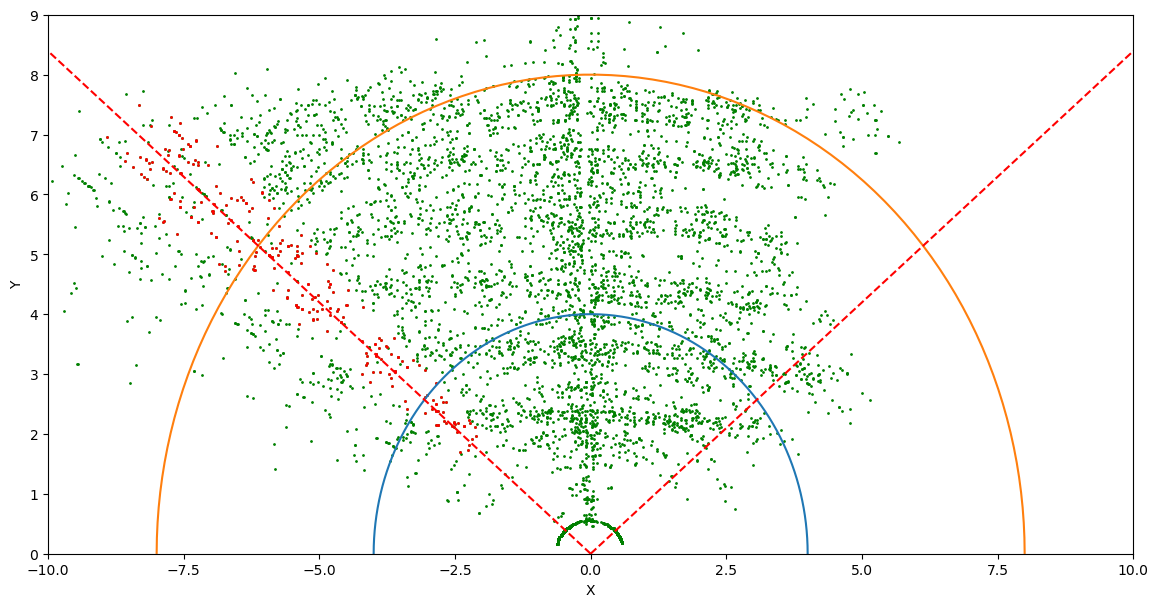

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import warnings
warnings.filterwarnings('ignore')



path = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/20241119_S6QI_FOV/*.xlsx"
file_paths = glob.glob(path)

conditions = [
    ((0, 5), 'blue'),
    ((5, 10), 'green'),
    ((10, 15), 'orange'),
    ((15, 20), 'red'),
    ((20, 25), 'yellow'),
    ((25, 30), 'purple'),
    ((30, float('inf')), 'black')
]

labels_added = {color: False for _, color in conditions}
all_data = []

angle = 40
R1 = 4
R2 = 8

Rmax = 45
Amax = 0.1
angles = np.linspace((180/angle-1)*np.pi/(180/angle), np.pi/(180/angle), 100)  # 135 to 45 degrees
A3 = np.linspace((180/Amax-1)*np.pi/(180/Amax), np.pi/(180/Amax), 100)

x1 = R1 * np.cos(A3)
y1 = R1 * np.sin(A3)
x2 = R2 * np.cos(A3)
y2 = R2 * np.sin(A3)
x3 = Rmax * np.cos(angles)
y3 = Rmax * np.sin(angles)

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(x1, y1, label=f'R = {R1}')
ax.plot(x2, y2, label=f'R = {R2}')

ax.plot([0, x3[0]], [0, y3[0]], 'r--')  
ax.plot([0, x3[-1]], [0, y3[-1]], 'r--') 


for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='CloudPoint')
    
    df_filtered = df[df['@_Range'] < 15]
    radians = np.abs(np.arctan(df_filtered['@_Y'] / df_filtered['@_X']))
    df_filtered['angle'] = np.sign(df_filtered['@_X']) * (90 - radians * (180.0 / np.pi))
    df_filtered['R'] =  np.sqrt(df_filtered['@_X']**2 + df_filtered['@_Y']**2)
    all_data.append(df_filtered)
    
    for (snr_min, snr_max), color in conditions:
        condition = (df_filtered['@_SNR'] >= snr_min) & (df_filtered['@_SNR'] < snr_max)
        x_values = df_filtered[condition]['@_X']
        y_values = df_filtered[condition]['@_Y']
        
      
        label = f'SNR {snr_min}-{snr_max if snr_max != float("inf") else "30+"}'
        if not labels_added[color] and len(x_values) > 0:
            ax.scatter(x_values, y_values, color='green', label=label, s = 1)
            labels_added[color] = True
        else:
            ax.scatter(x_values, y_values, color='green', s = 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim((-10,10))
plt.ylim((0,9))

# ax.legend(loc="best")

all_data_df = pd.concat(all_data, ignore_index=True)
for i in range(2, 8):    
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-55)) & (all_data_df['angle'] <= (-45))& (all_data_df['@_SNR'] > 10)]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")
    ax.scatter(filtered_data['@_X'], filtered_data['@_Y'], color='red', s = 1)

    
plt.show()